# Exploratory Data Analysis - Party News Dataset

Este notebook visa explorar os dados de notícias de partidos políticos brasileiros.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Carregamento dos Dados

In [11]:
# Carregar o arquivo parquet
df = pd.read_parquet('../data/external/party_news.parquet')

# Informações básicas
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (117849, 11)

Columns: ['id', 'title', 'subtitle', 'published_at', 'published_at_as_date', 'content', 'url', 'created_at', 'created_at_as_date', 'author', 'preprocessed_text']


## 2. Visão Geral dos Dados

In [12]:
# Primeiras linhas
df.head(10)

,id,title,subtitle,published_at,published_at_as_date,content,url,created_at,created_at_as_date,author,preprocessed_text
0,139220,Desalento e cinismo – João Carlos de Oliveira,"O setor exportador, porque cresce, gera empreg...",2004-04-23,2004-04-23,"Há, sim, um espetáculo em curso: o do cinismo....",https://www.psdb.org.br/acompanhe/noticias/des...,2026-01-17 19:02:51,2026-01-17 19:02:51.670155,psdb.org.br,"Ha, sim, espetaculo curso: cinismo. falar aqui..."
1,139221,"“Desalento total para os trabalhadores”, diz C...",,2016-02-29,2016-02-29,"O polo de moveis de Ubá, em Minas Gerais – um ...",https://www.psdb.org.br/acompanhe/desalento-to...,2026-01-17 19:02:51,2026-01-17 19:02:51.696000,psdb.org.br,"polo moveis Uba, Minas Gerais – importantes ge..."
2,139222,"“Desânimo industrial”, editorial da Folha de S...",,2013-02-04,2013-02-04,* Editorial do jornal Folha de São Paulo publi...,https://www.psdb.org.br/acompanhe/desanimo-ind...,2026-01-17 19:02:51,2026-01-17 19:02:51.723433,psdb.org.br,* Editorial jornal Folha Sao Paulo publicado e...
3,139228,Desarticulação até no ataque,Chinaglia reclamava: ¥Cadê o nosso pessoal que...,2005-06-15,2005-06-15,Correio Braziliense (15 de junho)– O Palácio d...,https://www.psdb.org.br/acompanhe/noticias/des...,2026-01-17 19:02:51,2026-01-17 19:02:51.876088,psdb.org.br,Correio Braziliense (15 junho)– Palacio Planal...
4,139229,Desassistência: na cheia e na seca,,2004-08-03,2004-08-03,"As chuvas deste ano, as mais fortes em 90 inve...",https://www.psdb.org.br/acompanhe/noticias/des...,2026-01-17 19:02:51,2026-01-17 19:02:51.900979,psdb.org.br,"chuvas deste ano, fortes 90 invernos, pontos c..."
5,139230,Desastre em Mariana: valor da multa é irrisóri...,,2015-11-18,2015-11-18,"A Samarco pagará R$ 1,25 bilhão pelo desastre ...",https://www.psdb.org.br/acompanhe/desastre-em-...,2026-01-17 19:02:51,2026-01-17 19:02:51.932626,psdb.org.br,"Samarco pagara R$ 1,25 bilhao desastre ambient..."
6,139249,"Descaso do governo Dilma com estradas, portos ...",,2016-08-08,2016-08-08,Os 13 anos de governos do PT no comando do paí...,https://www.psdb.org.br/acompanhe/noticias/des...,2026-01-17 19:02:52,2026-01-17 19:02:52.472893,psdb.org.br,13 anos governos PT comando pais trouxeram pre...
7,139262,Desconforto matemático,"O discurso do crescimento explosivo, de 6% anu...",2004-03-03,2004-03-03,"O ministro da Fazenda, Antonio Palocci, e o pr...",https://www.psdb.org.br/acompanhe/noticias/des...,2026-01-17 19:02:52,2026-01-17 19:02:52.835147,psdb.org.br,"ministro Fazenda, Antonio Palocci, presidente ..."
8,161777,O petróleo é nosso,Mudança no sistema de exploração é um maiores ...,2010-06-16,2010-06-16,Brasília (16) – A mudança do sistema de explor...,https://www.psdb.org.br/acompanhe/noticias/o-p...,2026-01-17 19:13:38,2026-01-17 19:13:38.763913,psdb.org.br,Brasilia (16) – mudanca sistema exploracao pet...
9,155089,Luiz Almir vai para o 2° turno em Natal (RN),"Candidato do PSDB obtém 30,46% dos votos válidos",2004-10-03,2004-10-03,Brasília (Agência Tucana) – Foi encerrada há p...,https://www.psdb.org.br/acompanhe/noticias/lui...,2026-01-17 19:10:16,2026-01-17 19:10:16.484569,psdb.org.br,Brasilia (Agencia Tucana) – encerrada ha pouco...


In [4]:
# Informações sobre tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117849 entries, 0 to 117848
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    117849 non-null  int64         
 1   title                 117849 non-null  object        
 2   subtitle              117849 non-null  object        
 3   published_at          117849 non-null  object        
 4   published_at_as_date  117849 non-null  datetime64[ns]
 5   content               117849 non-null  object        
 6   url                   117849 non-null  object        
 7   created_at            117849 non-null  object        
 8   created_at_as_date    117849 non-null  datetime64[ns]
 9   author                117849 non-null  object        
 10  preprocessed_text     117849 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 9.9+ MB


In [5]:
# Estatísticas descritivas
df.describe(include='all')

,id,title,subtitle,published_at,published_at_as_date,content,url,created_at,created_at_as_date,author,preprocessed_text
count,117849.000000,117849,117849,117849,117849,117849,117849,117849,117849,117849,117849
unique,NaN,117241,61549,48512,NaN,113743,116079,3244,NaN,3,113710
top,NaN,"Presidente nacional do PSDB, senador Aécio Neves",,2007-07-18,NaN,Compartilhe essa notícia:,psdb.org.br,2026-01-17 18:40:31,NaN,psdb.org.br,Compartilhe noticia:
freq,NaN,51,56032,70,NaN,2226,1771,105,NaN,66295,2227
mean,126501.339146,NaN,NaN,NaN,2014-10-13 10:58:27.656747520,NaN,NaN,NaN,2026-01-17 18:59:47.571384320,NaN,NaN
min,66952.000000,NaN,NaN,NaN,1999-01-01 00:00:00,NaN,NaN,NaN,2026-01-17 18:39:58.908795,NaN,NaN
25%,96463.000000,NaN,NaN,NaN,2008-03-28 00:00:00,NaN,NaN,NaN,2026-01-17 18:47:01.982323968,NaN,NaN
50%,126253.000000,NaN,NaN,NaN,2015-07-20 17:45:00,NaN,NaN,NaN,2026-01-17 18:57:21.480940032,NaN,NaN
75%,156525.000000,NaN,NaN,NaN,2019-05-16 15:55:00,NaN,NaN,NaN,2026-01-17 19:10:59.426626048,NaN,NaN
max,186751.000000,NaN,NaN,NaN,2026-01-13 19:39:00,NaN,NaN,NaN,2026-01-17 19:34:01.100570,NaN,NaN


## 3. Análise de Valores Ausentes

In [6]:
# Verificar valores nulos
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})

missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

,Missing Count,Percentage


In [7]:
# Visualização de valores ausentes
if missing_df['Missing Count'].sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_data = missing_df[missing_df['Missing Count'] > 0].sort_values('Percentage', ascending=False)
    plt.bar(range(len(missing_data)), missing_data['Percentage'])
    plt.xticks(range(len(missing_data)), missing_data.index, rotation=45, ha='right')
    plt.ylabel('Percentage (%)')
    plt.title('Porcentagem de Valores Ausentes por Coluna')
    plt.tight_layout()
    plt.show()
else:
    print("Não há valores ausentes no dataset!")

Não há valores ausentes no dataset!


## 4. Análise Temporal

In [8]:
# Converter coluna de data
date_col = None
if 'published_at_as_date' in df.columns:
    df['published_at_as_date'] = pd.to_datetime(df['published_at_as_date'])
    date_col = 'published_at_as_date'
elif 'published_at_as_date' in df.columns:
    df['published_at_as_date'] = pd.to_datetime(df['published_at_as_date'])
    date_col = 'published_at_as_date'
elif 'published_at' in df.columns:
    df['published_at'] = pd.to_datetime(df['published_at'])
    date_col = 'published_at'

if date_col:
    print(f"Período dos dados: {df[date_col].min()} até {df[date_col].max()}")
    print(f"Duração: {(df[date_col].max() - df[date_col].min()).days} dias")
    print(f"Total de notícias: {len(df):,}")
else:
    print("Coluna de data não encontrada")

Período dos dados: 1999-01-01 00:00:00 até 2026-01-13 19:39:00
Duração: 9874 dias
Total de notícias: 117,849


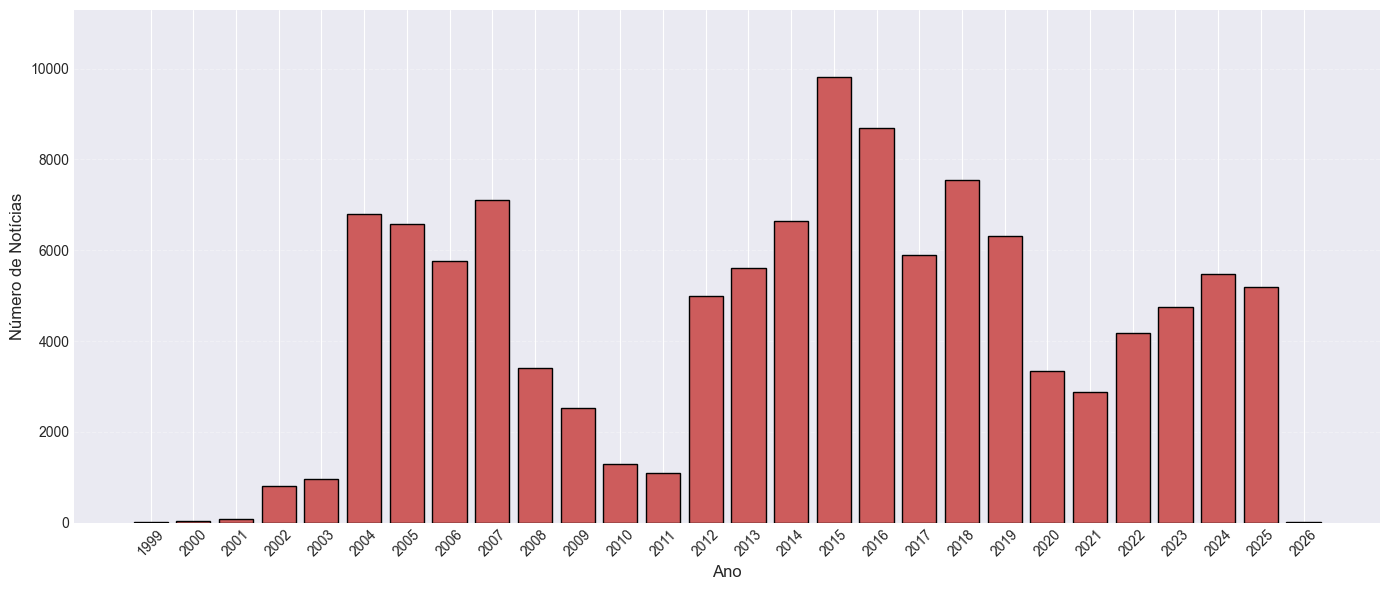


Notícias por ano:
year
1999      16
2000      33
2001      78
2002     803
2003     956
2004    6809
2005    6580
2006    5763
2007    7116
2008    3398
2009    2527
2010    1283
2011    1104
2012    4995
2013    5606
2014    6648
2015    9817
2016    8700
2017    5892
2018    7553
2019    6320
2020    3350
2021    2878
2022    4169
2023    4757
2024    5479
2025    5200
2026      19
Name: count, dtype: int64


In [ ]:
# Distribuição temporal de notícias
if date_col:
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['year_month'] = df[date_col].dt.to_period('M')
    df['day_of_week'] = df[date_col].dt.day_name()
    
    # Notícias por ano
    yearly_counts = df['year'].value_counts().sort_index()
    
    plt.figure(figsize=(14, 6))
    
    # Gráfico na cor vermelha
    bars = plt.bar(yearly_counts.index, yearly_counts.values, color='indianred', edgecolor='black')
    
    # plt.title('Distribuição de Notícias por Ano', fontsize=14, fontweight='bold') # Título comentado
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Número de Notícias', fontsize=12)
    plt.xticks(yearly_counts.index, rotation=45)
    
    # AJUSTE PARA NÃO CORTAR: Aumenta o topo para caber os textos
    if not yearly_counts.empty:
        plt.ylim(0, yearly_counts.max() * 1.20) # 20% de margem para os textos
    
    # Adicionando quantidade e porcentagem em cima de cada barra
    total = yearly_counts.sum()
    for i, count in enumerate(yearly_counts):
        percentage = (count / total) * 100
        # O primeiro parâmetro é a posição X (o ano), o segundo é a altura Y (o count)
        plt.text(yearly_counts.index[i], count, f'{count}\n({percentage:.1f}%)', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    print("\nNotícias por ano:")
    print(yearly_counts)

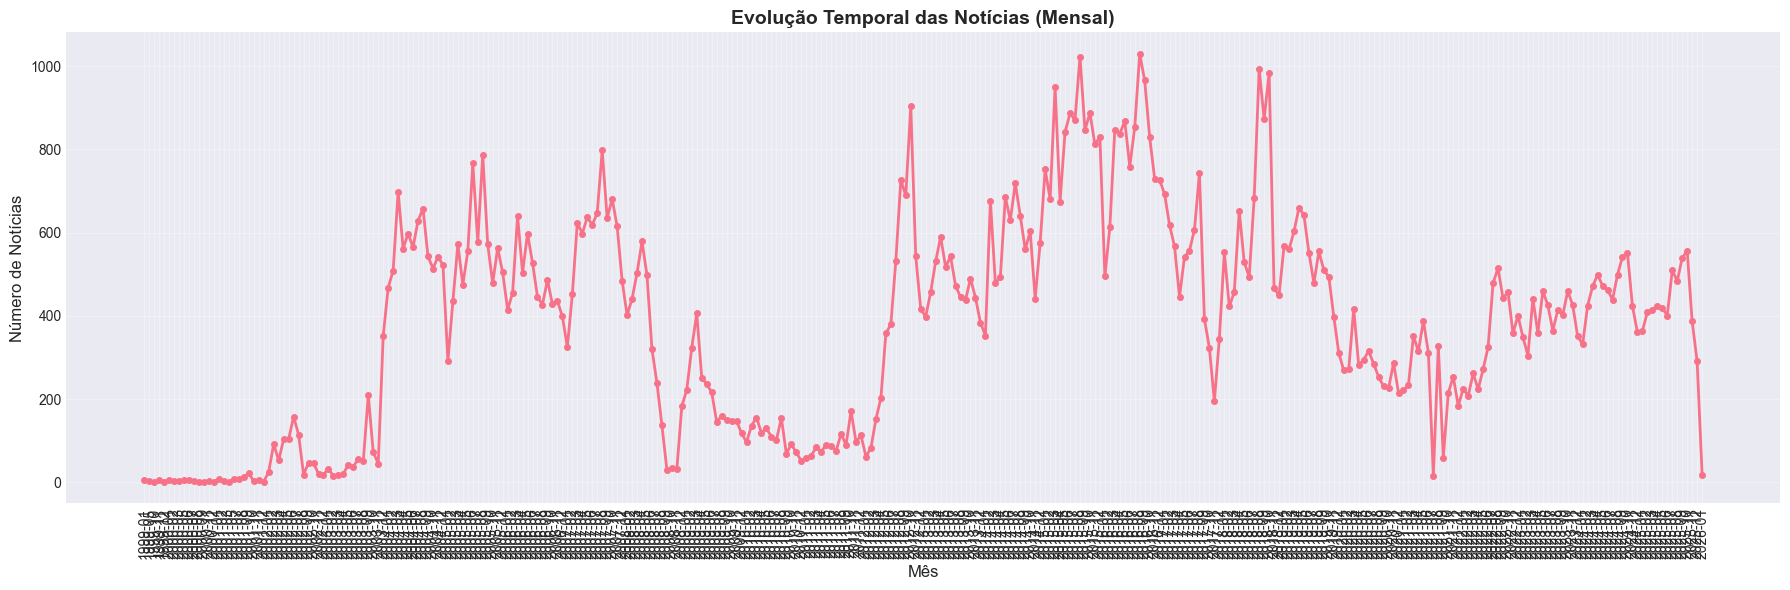

In [45]:
# Evolução temporal mensal
if date_col:
    monthly_counts = df.groupby('year_month').size()
    
    plt.figure(figsize=(18, 6))
    plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o', linewidth=2, markersize=4)
    plt.xlabel('Mês', fontsize=12)
    plt.ylabel('Número de Notícias', fontsize=12)
    plt.title('Evolução Temporal das Notícias (Mensal)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=90)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

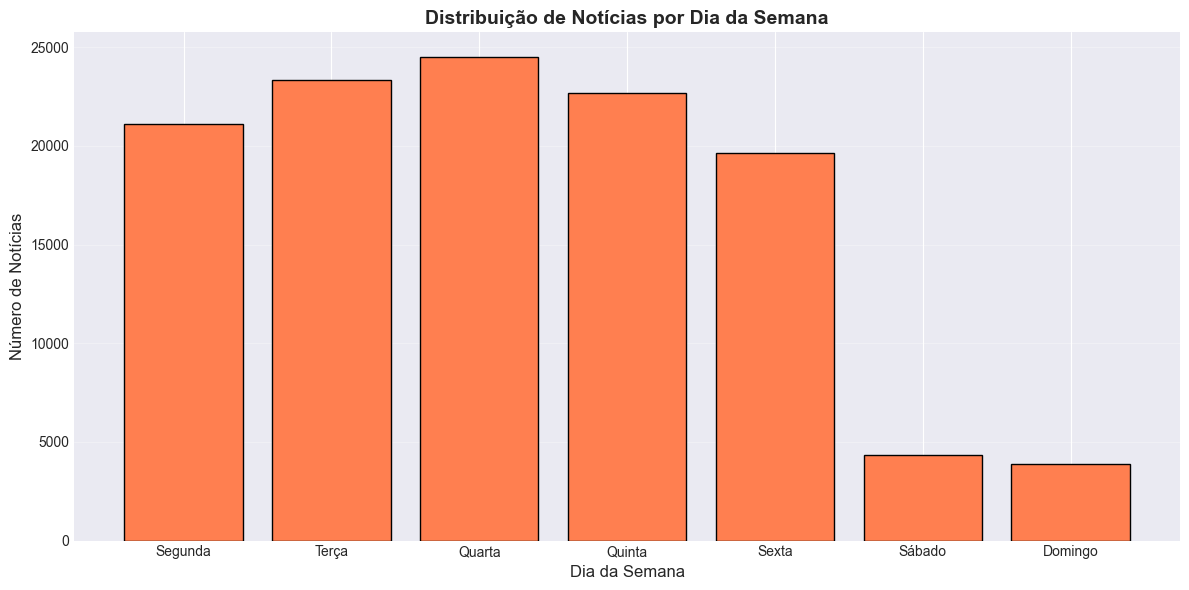

In [46]:
# Distribuição por dia da semana
if date_col:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df['day_of_week'].value_counts().reindex(day_order)
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(day_counts)), day_counts.values, color='coral', edgecolor='black')
    plt.xticks(range(len(day_counts)), ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
    plt.xlabel('Dia da Semana', fontsize=12)
    plt.ylabel('Número de Notícias', fontsize=12)
    plt.title('Distribuição de Notícias por Dia da Semana', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

## 5. Análise de Conteúdo

In [22]:
# Análise de tamanho dos textos
if 'content' in df.columns:
    df['content_length'] = df['content'].fillna('').str.len()
    df['word_count'] = df['content'].fillna('').str.split().str.len()
    
    print("Estatísticas de Tamanho do Conteúdo:")
    print(df[['content_length', 'word_count']].describe())

Estatísticas de Tamanho do Conteúdo:
       content_length     word_count
count   117849.000000  117849.000000
mean      2658.372061     424.516958
std       2446.574064     395.060727
min          4.000000       1.000000
25%       1365.000000     216.000000
50%       2148.000000     341.000000
75%       3374.000000     540.000000
max     211984.000000   35015.000000


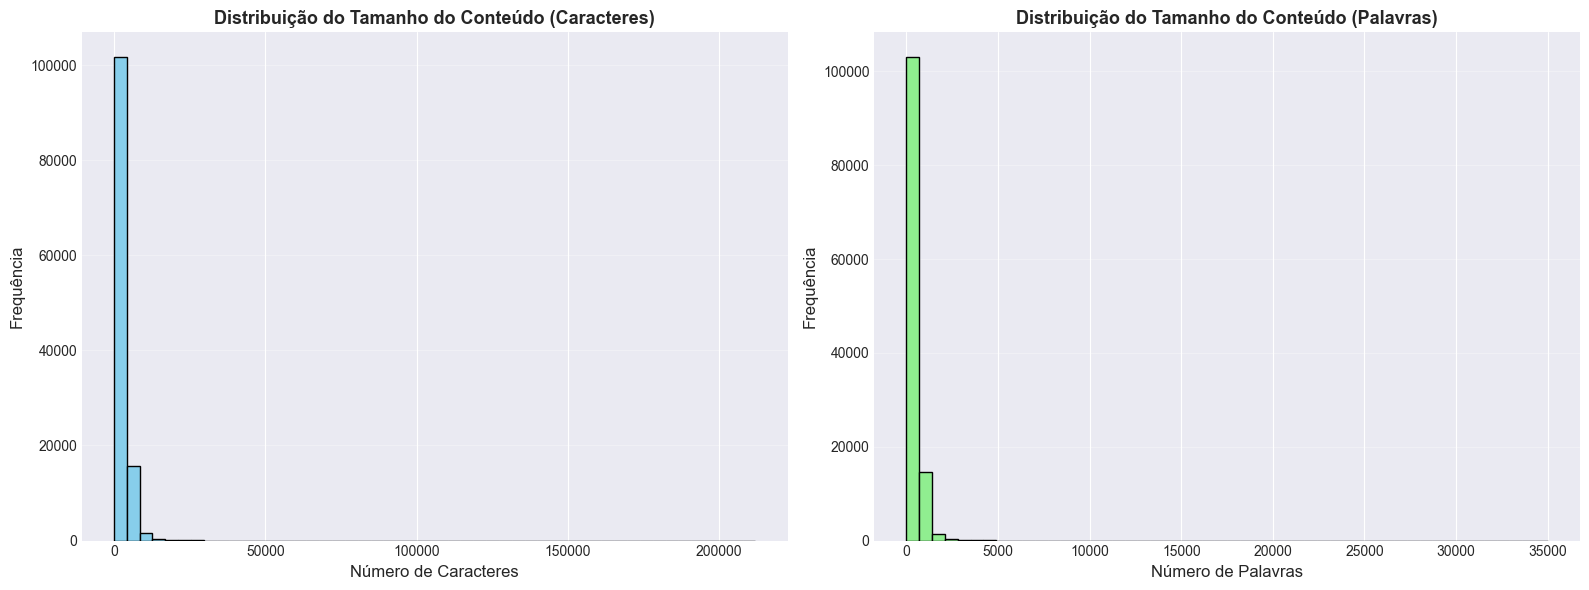

In [48]:
# Distribuição do tamanho dos textos
if 'content_length' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histograma de caracteres
    axes[0].hist(df['content_length'], bins=50, edgecolor='black', color='skyblue')
    axes[0].set_xlabel('Número de Caracteres', fontsize=12)
    axes[0].set_ylabel('Frequência', fontsize=12)
    axes[0].set_title('Distribuição do Tamanho do Conteúdo (Caracteres)', fontsize=13, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Histograma de palavras
    axes[1].hist(df['word_count'], bins=50, edgecolor='black', color='lightgreen')
    axes[1].set_xlabel('Número de Palavras', fontsize=12)
    axes[1].set_ylabel('Frequência', fontsize=12)
    axes[1].set_title('Distribuição do Tamanho do Conteúdo (Palavras)', fontsize=13, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Estatísticas de Tamanho dos Títulos:
        title_length  title_word_count
count  119800.000000     119800.000000
mean       62.965175         10.043172
std        19.618322          3.205961
min         0.000000          0.000000
25%        50.000000          8.000000
50%        61.000000         10.000000
75%        74.000000         12.000000
max       200.000000         39.000000


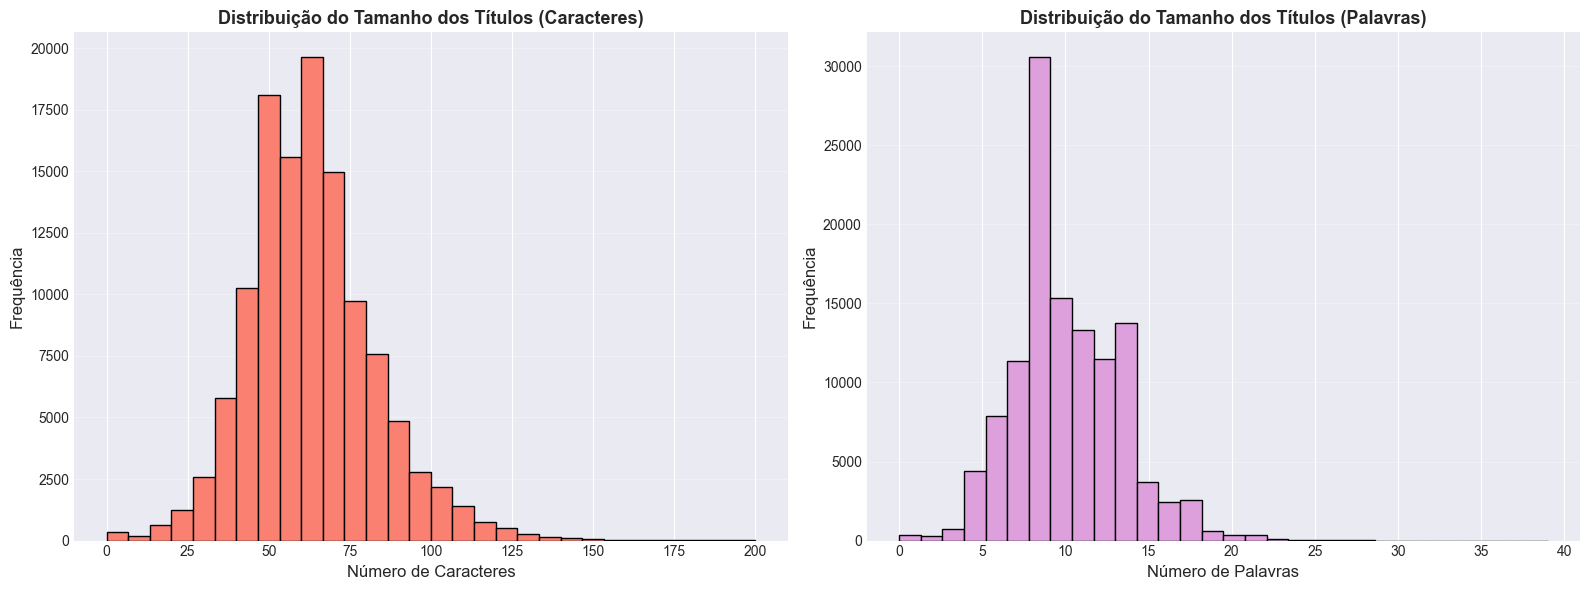

In [49]:
# Análise de títulos
if 'title' in df.columns:
    df['title_length'] = df['title'].fillna('').str.len()
    df['title_word_count'] = df['title'].fillna('').str.split().str.len()
    
    print("Estatísticas de Tamanho dos Títulos:")
    print(df[['title_length', 'title_word_count']].describe())
    
    # Visualização
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].hist(df['title_length'], bins=30, edgecolor='black', color='salmon')
    axes[0].set_xlabel('Número de Caracteres', fontsize=12)
    axes[0].set_ylabel('Frequência', fontsize=12)
    axes[0].set_title('Distribuição do Tamanho dos Títulos (Caracteres)', fontsize=13, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    axes[1].hist(df['title_word_count'], bins=30, edgecolor='black', color='plum')
    axes[1].set_xlabel('Número de Palavras', fontsize=12)
    axes[1].set_ylabel('Frequência', fontsize=12)
    axes[1].set_title('Distribuição do Tamanho dos Títulos (Palavras)', fontsize=13, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 6. Análise de Autores

In [23]:
# Análise de autores
if 'author' in df.columns:
    # Remover valores nulos
    authors_df = df[df['author'].notna()]
    
    if len(authors_df) > 0:
        author_counts = authors_df['author'].value_counts()
        
        print(f"Total de autores únicos: {len(author_counts)}")
        print(f"Notícias com autor identificado: {len(authors_df)} ({len(authors_df)/len(df)*100:.1f}%)")
        print(f"Notícias sem autor: {len(df) - len(authors_df)} ({(len(df) - len(authors_df))/len(df)*100:.1f}%)")
        
        if len(author_counts) > 0:
            print(f"\nTop 10 autores:")
            print(author_counts.head(10))
    else:
        print("Não há informações de autores no dataset.")
        author_counts = pd.Series(dtype=int)
else:
    print("Coluna 'author' não encontrada.")
    author_counts = pd.Series(dtype=int)

Total de autores únicos: 3
Notícias com autor identificado: 117849 (100.0%)
Notícias sem autor: 0 (0.0%)

Top 10 autores:
author
psdb.org.br              66295
pt.org.br                42549
partidoliberal.org.br     9005
Name: count, dtype: int64


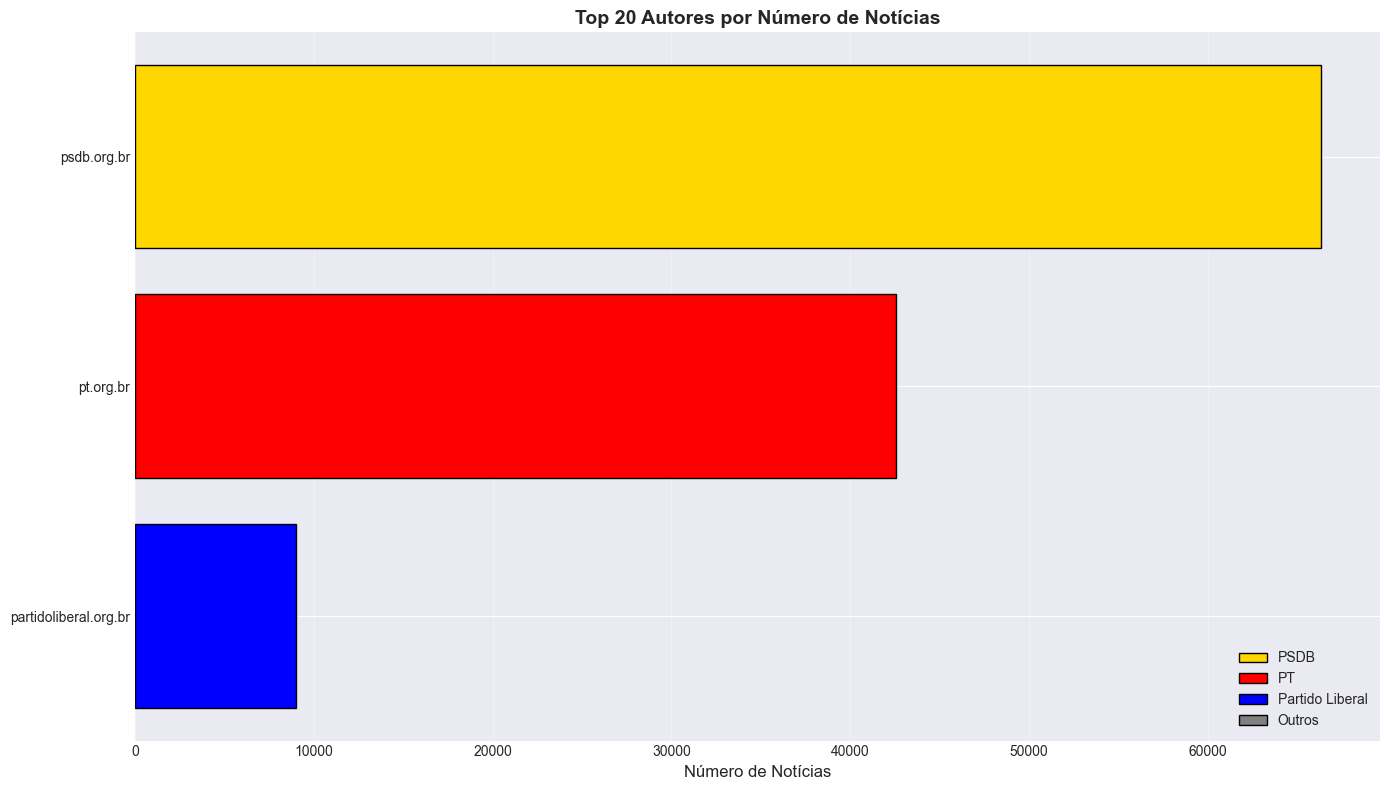

In [24]:
# Visualização dos top autores com cores por partido
if 'author' in df.columns and len(author_counts) > 0:
    top_authors = author_counts.head(20)
    
    if len(top_authors) > 0:
        # Função para determinar a cor baseada no autor/partido
        def get_party_color(author):
            author_lower = str(author).lower()
            if 'psdb.org.br' in author_lower:
                return '#FFD700'  # Amarelo (PSDB)
            elif 'pt.org.br' in author_lower:
                return '#FF0000'  # Vermelho (PT)
            elif 'partidoliberal.org.br' in author_lower:
                return '#0000FF'  # Azul (Partido Liberal)
            else:
                return '#808080'  # Cinza (outros)
        
        # Criar lista de cores para cada autor
        colors = [get_party_color(author) for author in top_authors.index]
        
        plt.figure(figsize=(14, 8))
        bars = plt.barh(range(len(top_authors)), top_authors.values, color=colors, edgecolor='black')
        plt.yticks(range(len(top_authors)), top_authors.index)
        plt.xlabel('Número de Notícias', fontsize=12)
        plt.title('Top 20 Autores por Número de Notícias', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        
        # Adicionar legenda
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='#FFD700', edgecolor='black', label='PSDB'),
            Patch(facecolor='#FF0000', edgecolor='black', label='PT'),
            Patch(facecolor='#0000FF', edgecolor='black', label='Partido Liberal'),
            Patch(facecolor='#808080', edgecolor='black', label='Outros')
        ]
        plt.legend(handles=legend_elements, loc='lower right', fontsize=10)
        
        plt.tight_layout()
        plt.show()
else:
    print("Não há dados suficientes de autores para visualização.")

## 7. Análise de URLs e Fontes

In [26]:
# Análise de domínios das URLs
if 'author' in df.columns:
    from urllib.parse import urlparse
    
    df['domain'] = df['author']
    domain_counts = df['domain'].value_counts()
    
    print(f"Total de domínios únicos: {len(domain_counts)}")
    if len(domain_counts) > 0:
        print(f"\nTop 10 domínios:")
        print(domain_counts.head(10))
else:
    domain_counts = pd.Series(dtype=int)

Total de domínios únicos: 3

Top 10 domínios:
domain
psdb.org.br              66295
pt.org.br                42549
partidoliberal.org.br     9005
Name: count, dtype: int64


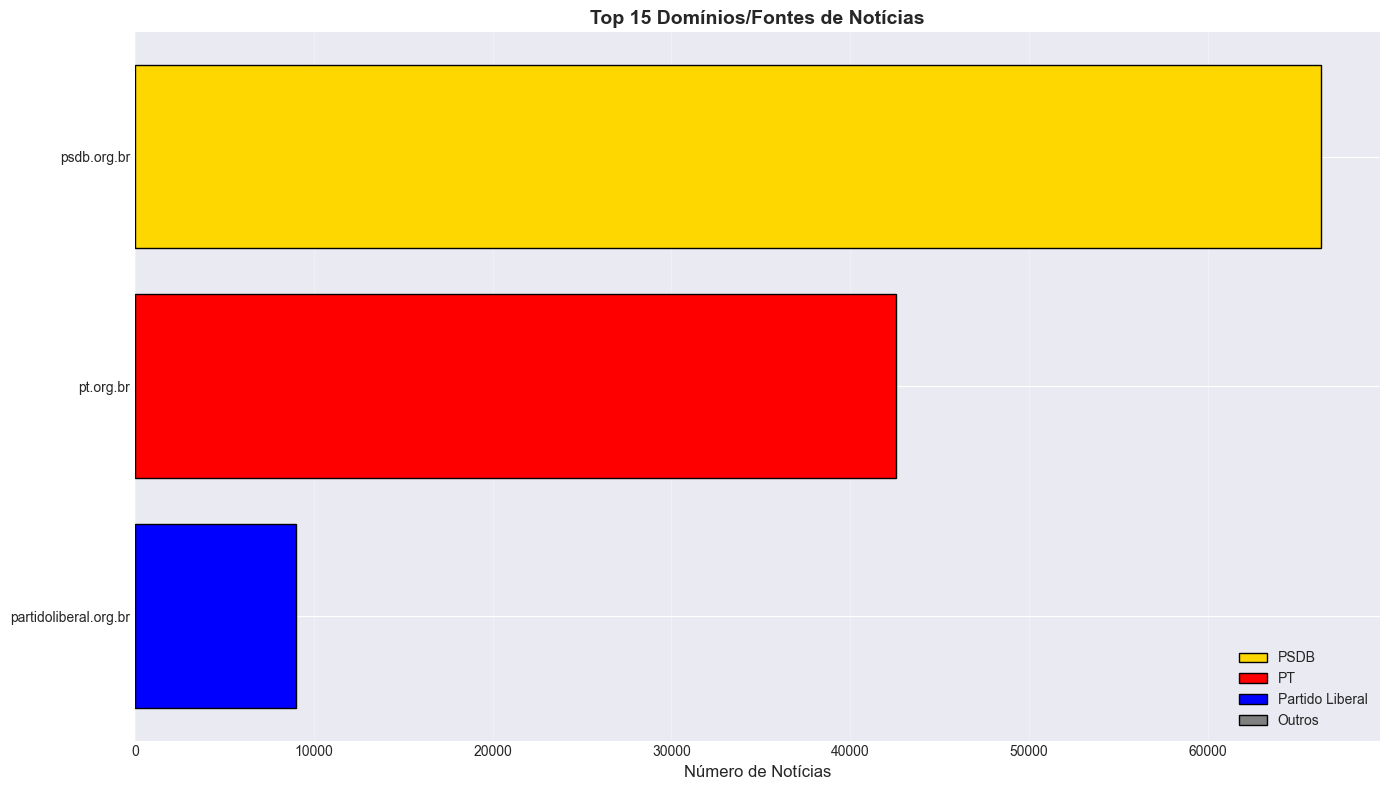

In [27]:
# Visualização dos top domínios com cores por partido
if 'domain' in df.columns and len(domain_counts) > 0:
    top_domains = domain_counts.head(15)
    
    if len(top_domains) > 0:
        # Função para determinar a cor baseada no domínio
        def get_domain_color(domain):
            domain_lower = str(domain).lower()
            if 'psdb.org.br' in domain_lower:
                return '#FFD700'  # Amarelo (PSDB)
            elif 'pt.org.br' in domain_lower:
                return '#FF0000'  # Vermelho (PT)
            elif 'partidoliberal.org.br' in domain_lower:
                return '#0000FF'  # Azul (Partido Liberal)
            else:
                return '#808080'  # Cinza (outros)
        
        # Criar lista de cores para cada domínio
        colors = [get_domain_color(domain) for domain in top_domains.index]
        
        plt.figure(figsize=(14, 8))
        plt.barh(range(len(top_domains)), top_domains.values, color=colors, edgecolor='black')
        plt.yticks(range(len(top_domains)), top_domains.index)
        plt.xlabel('Número de Notícias', fontsize=12)
        plt.title('Top 15 Domínios/Fontes de Notícias', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        
        # Adicionar legenda
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='#FFD700', edgecolor='black', label='PSDB'),
            Patch(facecolor='#FF0000', edgecolor='black', label='PT'),
            Patch(facecolor='#0000FF', edgecolor='black', label='Partido Liberal'),
            Patch(facecolor='#808080', edgecolor='black', label='Outros')
        ]
        plt.legend(handles=legend_elements, loc='lower right', fontsize=10)
        
        plt.tight_layout()
        plt.show()
else:
    print("Não há dados suficientes de domínios para visualização.")

## 8. Análise de Subtítulos

In [54]:
# Análise de subtítulos
if 'subtitle' in df.columns:
    subtitle_present = df['subtitle'].notna().sum()
    subtitle_missing = df['subtitle'].isna().sum()
    
    print(f"Notícias com subtítulo: {subtitle_present} ({subtitle_present/len(df)*100:.1f}%)")
    print(f"Notícias sem subtítulo: {subtitle_missing} ({subtitle_missing/len(df)*100:.1f}%)")
    
    if subtitle_present > 0:
        df['subtitle_length'] = df['subtitle'].fillna('').str.len()
        print(f"\nEstatísticas de tamanho dos subtítulos:")
        print(df[df['subtitle'].notna()]['subtitle_length'].describe())

Notícias com subtítulo: 119800 (100.0%)
Notícias sem subtítulo: 0 (0.0%)

Estatísticas de tamanho dos subtítulos:
count    119800.000000
mean         77.552613
std          96.763189
min           0.000000
25%           0.000000
50%          54.000000
75%         143.000000
max        1164.000000
Name: subtitle_length, dtype: float64


## 9. Análise de Duplicatas

In [28]:
# Verificar duplicatas
duplicates = df.duplicated().sum()
print(f"Número total de linhas duplicadas: {duplicates}")

if 'title' in df.columns:
    title_duplicates = df['title'].duplicated().sum()
    print(f"Número de títulos duplicados: {title_duplicates}")
    
    if title_duplicates > 0 and date_col:
        print(f"\nExemplos de títulos duplicados:")
        dup_titles = df[df['title'].duplicated(keep=False)].sort_values('title')
        print(dup_titles[['title', date_col]].head(10))

if 'content' in df.columns:
    content_duplicates = df['content'].duplicated().sum()
    print(f"\nNúmero de conteúdos duplicados: {content_duplicates}")

if 'url' in df.columns:
    url_duplicates = df['url'].duplicated().sum()
    print(f"Número de URLs duplicadas: {url_duplicates}")

Número total de linhas duplicadas: 0
Número de títulos duplicados: 608

Exemplos de títulos duplicados:
       title published_at_as_date
92554                  2021-10-18
75469                  2019-08-23
75423                  2022-08-22
75098                  2019-12-06
116254                 2018-06-28
28296                  2019-12-05
46875                  2020-06-04
70147                  2019-11-22
50011                  2020-05-02
3843                   2020-08-14

Número de conteúdos duplicados: 4106
Número de URLs duplicadas: 1770


## 10. Correlações e Análises Cruzadas

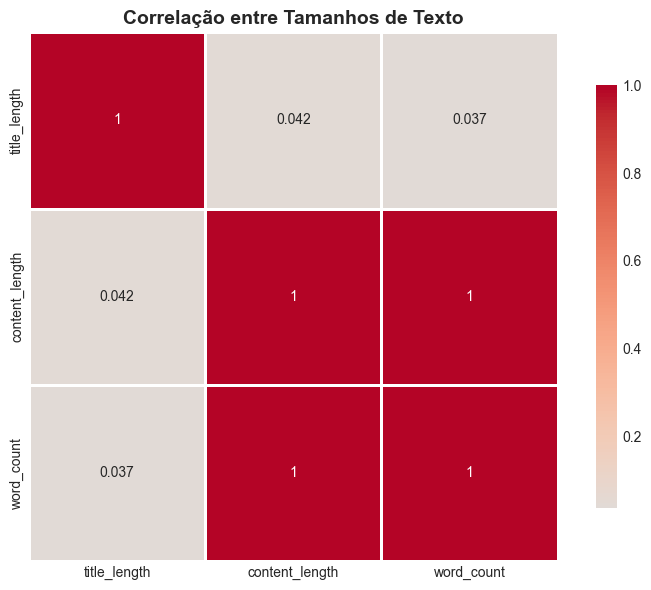

In [56]:
# Correlação entre tamanho de título e conteúdo
if 'title_length' in df.columns and 'content_length' in df.columns:
    correlation = df[['title_length', 'content_length', 'word_count']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlação entre Tamanhos de Texto', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

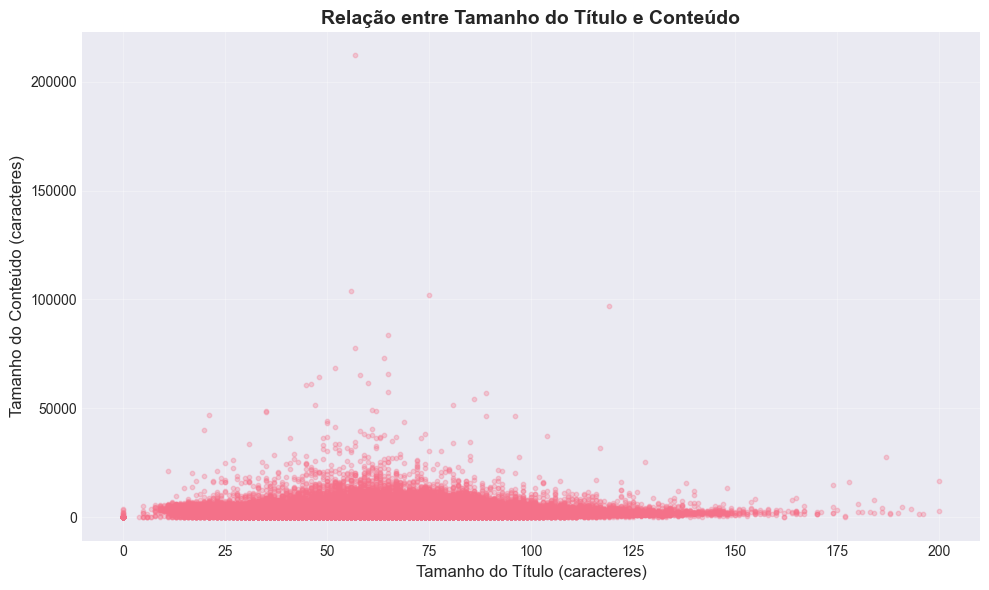

In [57]:
# Scatter plot: título vs conteúdo
if 'title_length' in df.columns and 'content_length' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['title_length'], df['content_length'], alpha=0.3, s=10)
    plt.xlabel('Tamanho do Título (caracteres)', fontsize=12)
    plt.ylabel('Tamanho do Conteúdo (caracteres)', fontsize=12)
    plt.title('Relação entre Tamanho do Título e Conteúdo', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 11. Resumo e Conclusões

In [29]:
print("=" * 70)
print("RESUMO DO DATASET - PARTY NEWS")
print("=" * 70)
print(f"\n📊 INFORMAÇÕES GERAIS")
print(f"   Total de registros: {len(df):,}")
print(f"   Total de colunas: {len(df.columns)}")

if date_col:
    print(f"\n📅 PERÍODO TEMPORAL")
    print(f"   Data inicial: {df[date_col].min().date()}")
    print(f"   Data final: {df[date_col].max().date()}")
    print(f"   Duração: {(df[date_col].max() - df[date_col].min()).days} dias")
    print(f"   Anos cobertos: {sorted(df['year'].unique())}")
    if 'year' in df.columns:
        year_counts = df['year'].value_counts()
        if len(year_counts) > 0:
            most_active_year = year_counts.index[0]
            print(f"   Ano mais ativo: {most_active_year} ({year_counts.values[0]:,} notícias)")

if 'content_length' in df.columns:
    print(f"\n📝 CONTEÚDO")
    print(f"   Tamanho médio do conteúdo: {df['content_length'].mean():.0f} caracteres")
    print(f"   Média de palavras por notícia: {df['word_count'].mean():.0f} palavras")
    print(f"   Maior notícia: {df['content_length'].max():,} caracteres")
    print(f"   Menor notícia: {df['content_length'].min():,} caracteres")

if 'title_length' in df.columns:
    print(f"\n📰 TÍTULOS")
    print(f"   Tamanho médio do título: {df['title_length'].mean():.0f} caracteres")
    print(f"   Média de palavras por título: {df['title_word_count'].mean():.0f} palavras")

if 'author' in df.columns and len(author_counts) > 0:
    print(f"\n✍️ AUTORES")
    print(f"   Total de autores únicos: {len(author_counts)}")
    if 'authors_df' in locals():
        print(f"   Notícias com autor: {len(authors_df):,} ({len(authors_df)/len(df)*100:.1f}%)")
    if len(author_counts) > 0:
        print(f"   Autor mais prolífico: {author_counts.index[0]} ({author_counts.values[0]:,} notícias)")

if 'domain' in df.columns and len(domain_counts) > 0:
    print(f"\n🌐 FONTES")
    print(f"   Total de domínios únicos: {len(domain_counts)}")
    print(f"   Domínio principal: {domain_counts.index[0]} ({domain_counts.values[0]:,} notícias)")

print(f"\n⚠️ QUALIDADE DOS DADOS")
print(f"   Valores ausentes: {df.isnull().sum().sum():,}")
print(f"   Duplicatas completas: {duplicates}")
if 'title' in df.columns:
    print(f"   Títulos duplicados: {title_duplicates}")

print("=" * 70)

RESUMO DO DATASET - PARTY NEWS

📊 INFORMAÇÕES GERAIS
   Total de registros: 117,849
   Total de colunas: 18

📅 PERÍODO TEMPORAL
   Data inicial: 1999-01-01
   Data final: 2026-01-13
   Duração: 9874 dias
   Anos cobertos: [np.int32(1999), np.int32(2000), np.int32(2001), np.int32(2002), np.int32(2003), np.int32(2004), np.int32(2005), np.int32(2006), np.int32(2007), np.int32(2008), np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025), np.int32(2026)]
   Ano mais ativo: 2015 (9,817 notícias)

📝 CONTEÚDO
   Tamanho médio do conteúdo: 2658 caracteres
   Média de palavras por notícia: 425 palavras
   Maior notícia: 211,984 caracteres
   Menor notícia: 4 caracteres

✍️ AUTORES
   Total de autores únicos: 3
   Notícias com autor: 117,849 (100.0%)
   Autor mais prolífico: psdb.org